In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt_style = {"text.usetex": True,
             "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
             "axes.spines.right" : False,
             "axes.spines.top" : False,
             "font.size": 22,
             "savefig.dpi": 600,
             "savefig.bbox": 'tight'
            }

np.random.seed(1)

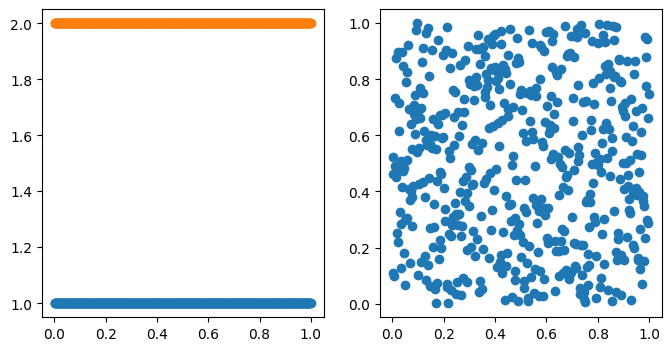

In [13]:
def lhs(n, samples):
    """Latin Hyper Cube sampling
    
    from : https://github.com/tisimst/pyDOE/blob/master/pyDOE/doe_lhs.py
    """
    # Generate the intervals
    cut = np.linspace(0, 1, samples + 1)    
    
    # Fill points uniformly in each interval
    u = np.random.rand(samples, n)
    a = cut[:samples]
    b = cut[1:samples + 1]
    rdpoints = np.zeros_like(u)
    for j in range(n):
        rdpoints[:, j] = u[:, j]*(b-a) + a
    
    # Make the random pairings
    H = np.zeros_like(rdpoints)
    for j in range(n):
        order = np.random.permutation(range(samples))
        H[:, j] = rdpoints[order, j]
    
    return rdpoints, H

n_samples  = 500
rd, lhd = lhs(2, n_samples)
fig, axs = plt.subplots(1,2, figsize=(4*2, 4))
axs[0].scatter(rd[:,0], np.ones(n_samples))
axs[0].scatter( rd[:,1], 2*np.ones(n_samples))
axs[1].scatter(lhd[:,0], lhd[:,1])
plt.show()

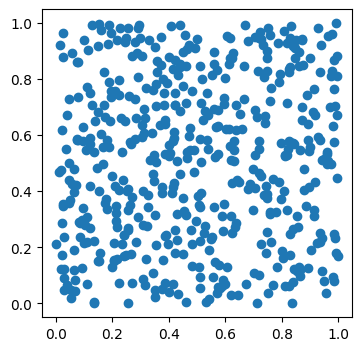

In [14]:
from scipy.stats.distributions import norm

gauss_data = np.random.normal(0,1,n_samples*2).reshape(n_samples,2)
gauss_cdf = np.zeros((n_samples,2))
for i in range(2):
    gauss_cdf[:,i] = norm(scale=1).cdf(gauss_data[:,i])
    
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(gauss_cdf[:,0], gauss_cdf[:,1])
plt.show()

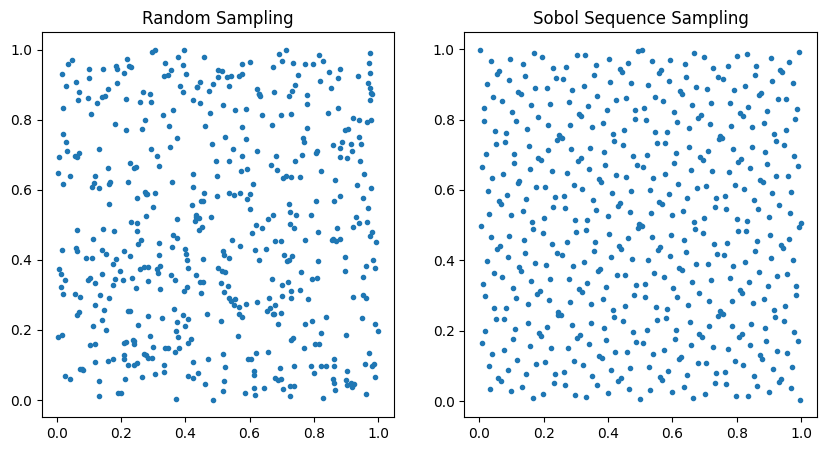

In [12]:
from scipy.stats import uniform
import sobol_seq

# Random point sampling
np.random.seed(0)
random_samples = uniform.rvs(size=(500, 2))

# Sobol sequence sampling
sobol_samples = sobol_seq.i4_sobol_generate(2, 500)

# Plot the samples
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(random_samples[:, 0], random_samples[:, 1], marker='.')
ax[0].set_title("Random Sampling")
ax[1].scatter(sobol_samples[:, 0], sobol_samples[:, 1], marker='.')
ax[1].set_title("Sobol Sequence Sampling")
plt.show()
